In [5]:
import numpy as np
import pandas as pd
import matplotlib as mp
import seaborn as seab

<AxesSubplot:xlabel='chroma_stft_mean'>

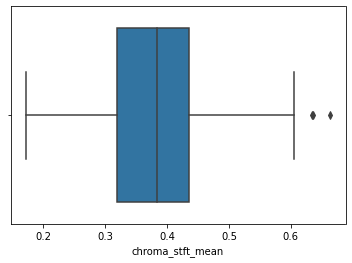

In [6]:
f30_df = pd.read_csv('../data/features_30_sec.csv')
f30_df.head()

seab.boxplot(x = f30_df['chroma_stft_mean'])


# Skeleton Plan

## Immediate Tasks and Challenges
- select framework

    - k-nearest neightbors (anything else?)

    - keras/sklearn/pytorch/tensorflow

- visualize feature data
    - already given mel spectrograms
    - plot chroma
    - investigate other features (rms, spectral_centroid, mfcc)
- assess feature data
- build deepNN genre prediction model

## Future Tasks and Challenges
- feature assessment part 2
- webpage design
- (reverse engineer /) quality assurance of feature extraction for new song data





# File Processing

1. Standardize data types
3. Check for garbage values
4. Remove Datum with feature outliers and store as separate table. Process both in parallel moving forward
4. Normalize features 

99. do it again for features_3 (possibly more important)

In [7]:
f30_df.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

Let's set length to float for the sake of consistency

In [8]:
f30_df['length'] = f30_df['length'].astype('float64')

In [9]:
f30_df.dtypes['length']

dtype('float64')

In [10]:
#look for trash values
f30_df.shape

(1000, 60)

In [11]:
f30_df.dropna(inplace = True)
f30_df.shape

(1000, 60)

**No features appear to contain invalid values.**

In [12]:
#learn how to identify quantile flags, then use to iterate through table for each label
f30_df['chroma_stft_var'].quantile(.02)

0.06744569465517998

In [13]:
f30_df['chroma_stft_var'].quantile(.98)

0.10048768103122711

In [14]:
f30_df['chroma_stft_var']

0      0.088757
1      0.094980
2      0.085275
3      0.093999
4      0.087841
         ...   
995    0.080487
996    0.075086
997    0.075268
998    0.091506
999    0.085884
Name: chroma_stft_var, Length: 1000, dtype: float64

In [15]:
qMin = f30_df['chroma_stft_var'].quantile(.02)
qMax = f30_df['chroma_stft_var'].quantile(.98)

f30_df[f30_df['chroma_stft_var'].between(qMin,qMax)]['chroma_stft_var'].reset_index()
#next: alter code so that it actually drops rows to create new df including other parameters

,index,chroma_stft_var
0,0,0.088757
1,1,0.094980
2,2,0.085275
3,3,0.093999
4,4,0.087841
...,...,...
955,995,0.080487
956,996,0.075086
957,997,0.075268
958,998,0.091506


In [16]:
#f30m_df = f30_df.between(f30_df.quantile(.02), f30_df.quantile(.98))
#does not work because quantiles can only be defined correctly within a single parameter/label

#define function to modify quantile of outlier removed from table (hyperparameter?):
#def removeOutliers(data,margin):
#    data.
    

# Visualizations

<AxesSubplot:xlabel='chroma_stft_mean'>

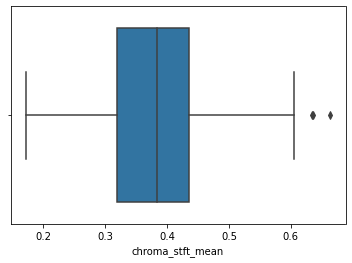

In [17]:
seab.boxplot(x = f30_df['chroma_stft_mean'])

<AxesSubplot:xlabel='chroma_stft_var'>

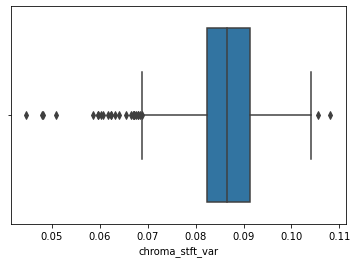

In [18]:
seab.boxplot(x = f30_df['chroma_stft_var'])

<AxesSubplot:xlabel='chroma_stft_var'>

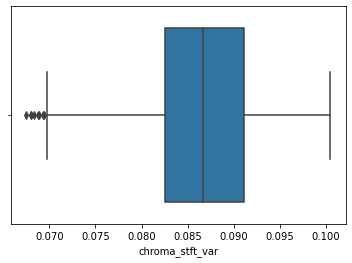

In [19]:
#compare with some outliers removed:
seab.boxplot(x = f30_df[f30_df['chroma_stft_var'].between(qMin,qMax)]['chroma_stft_var'])

<AxesSubplot:>

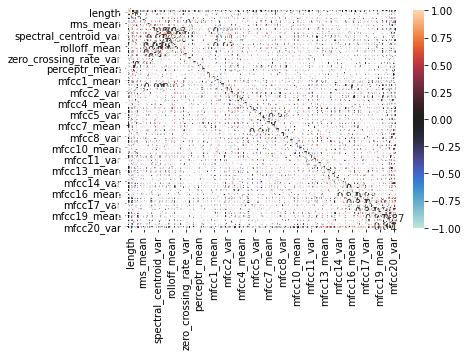

In [24]:
seab.heatmap(f30_df.corr(), annot=True, vmin=-1, vmax=1, center= 0) 
#no idea what latter parameters do, copied from HW1 solution

Turns out that full heatmaps aren't particularly useful when you have 60 parameters

<AxesSubplot:>

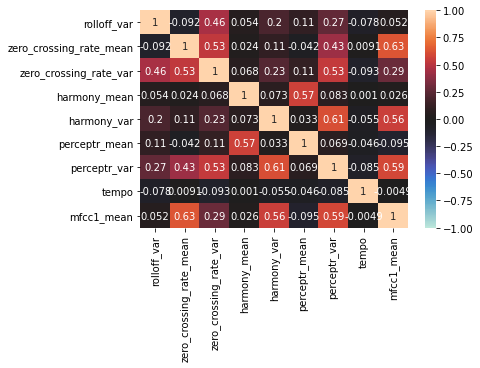

In [30]:
seab.heatmap(f30_df[f30_df.columns[11:20]].corr(), annot=True, vmin=-1, vmax=1, center= 0) 